In [4]:
# Import packages 
import sys
import argparse as arg

import time
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# import modules in other directories
sys.path.append('../Regridder/')
import scripGen as SG
sys.path.append('../Utils/')
import VertGridUtils as VGU

sys.path.append('../../myPythonTools/Utils/')
import utils as uti

import importlib
importlib.reload( SG )
importlib.reload( VGU )

#Rdry = Con.Rdry() # 



<module 'VertGridUtils' from '/glade/work/juliob/PyRegridding/Drivers/../Utils/VertGridUtils.py'>

 given by

p(\eta) = A(\eta) p_0 + B(\eta) p_s.

In [5]:
B = uti.MakeDict4Exp( exp='c64_005mm_ne30pg3_FMTHIST_NOmovmtn' ,
                     user='juliob', subd='regridded' , 
                     hsPat='cam.h0a' , ymdPat='1985-01' ,verbose=True, open_dataset=True )

C = uti.MakeDict4Exp( exp='c64_005mm_ne30pg3_FMTHIST_CTL' ,
                     user='juliob', subd='regridded' , 
                     hsPat='cam.h0a' , ymdPat='1985-01' ,verbose=True, open_dataset=True )

A = uti.MakeDict4Exp( exp='c153_ne30pg3_FMTHIST_x02'   , user='juliob', subd='regridded' , 
                     hsPat='cam.h0a' , ymdPat='1985-01' ,verbose=True, open_dataset=True )



exp_C=C.exp
exp_B=B.exp
exp_Val='ERA5'

Is ymdPat a list False
/glade/derecho/scratch/juliob/archive/c64_005mm_ne30pg3_FMTHIST_NOmovmtn/atm/regridded/c64_005mm_ne30pg3_FMTHIST_NOmovmtn.cam.h0a.1985-01.nc
Is ymdPat a list False
/glade/derecho/scratch/juliob/archive/c64_005mm_ne30pg3_FMTHIST_CTL/atm/regridded/c64_005mm_ne30pg3_FMTHIST_CTL.cam.h0a.1985-01.nc
Is ymdPat a list False
/glade/derecho/scratch/juliob/archive/c153_ne30pg3_FMTHIST_x02/atm/regridded/c153_ne30pg3_FMTHIST_x02.cam.h0a.1985-01.nc


In [6]:

hyai_A = A.X.hyai.values
hybi_A = A.X.hybi.values
hyai_B = B.X.hyai.values
hybi_B = B.X.hybi.values

p_A = hyai_A + hybi_A
p_B = hyai_B + hybi_B


Text(0.5, 1.0, '$\\mathrm{hybrid}~~A(\\eta)~~\\mathrm{and}~~B(\\eta)$')

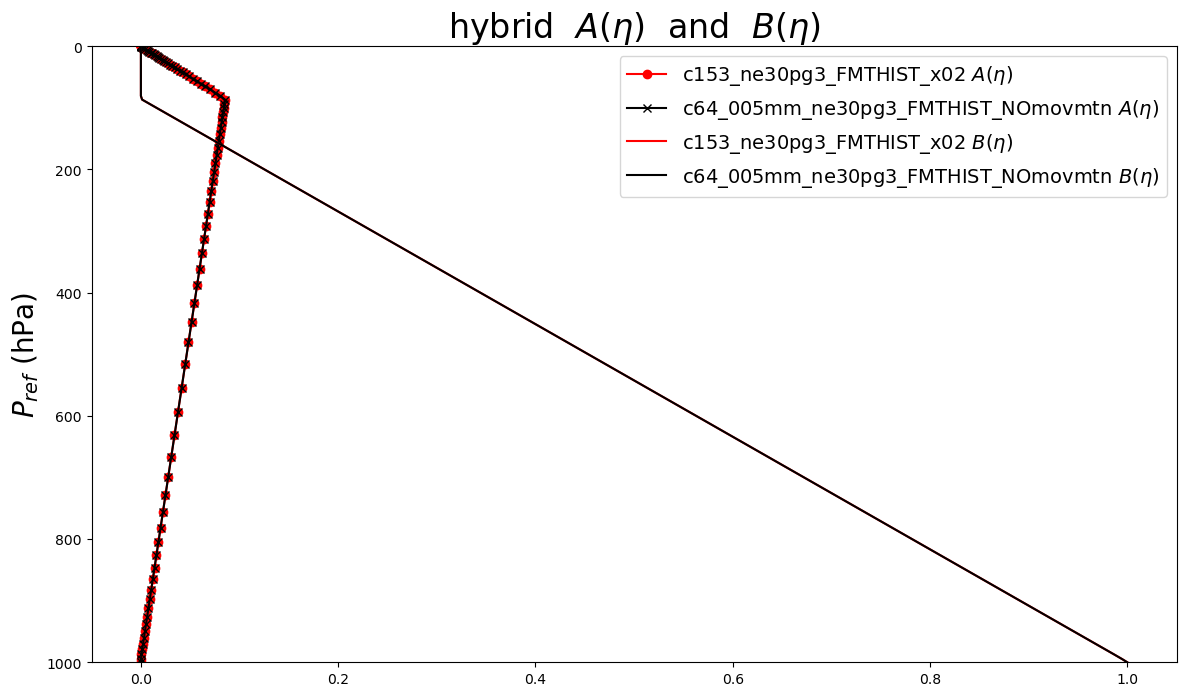

In [8]:
#plt.plot(p58,bb)
#plt.plot(p58,L58.hybi)
#plt.plot(p58,aa)

fig,ax=plt.subplots( 1,1 , squeeze=False, figsize=(14,8) )

ax[0,0].plot(hyai_A  , 1_000.*p_A, '-o' ,color='red'  , label=f'{A.exp} $A(\eta)$' )
ax[0,0].plot(hyai_B , 1_000.*p_B ,'-x', color='black' , label=f'{B.exp} $A(\eta)$'  )
ax[0,0].plot(hybi_A  , 1_000.*p_A ,color='red' , label =f'{A.exp} $B(\eta)$' )
ax[0,0].plot(hybi_B , 1_000.*p_B, color='black' , label =f'{B.exp} $B(\eta)$'  )


plt.ylim( (1000.,0.) )
plt.legend(fontsize=14)
plt.ylabel( "$P_{ref}$ (hPa)" ,fontsize=20)
plt.title( "$\mathrm{hybrid}~~A(\eta)~~\mathrm{and}~~B(\eta)$", fontsize=24 )